In [75]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels import robust

from scipy import stats
from sklearn import datasets, linear_model
import sys

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

In [38]:
rand_a = np.random.rand()
# print(rand_a)

rand_a = np.random.rand(2,5)
# print(rand_a)

rand_b = np.random.rand(1,5)
rand_b *= 100
# print(rand_b)

rand_c = np.vstack((rand_a,rand_b))
# print(rand_c)

rand_b = np.random.rand(2,1)
# print(rand_b)

rand_c = np.hstack((rand_a,rand_b))
# print(rand_c)

X = rand_c[:,2]

a = 3
b = 8
y = a*X+b

# X = np.random.randint(size = 10, low = 0, high = 10)
X = np.random.randint(10, size = 10)
X *= 10
# print(X)

np.random.choice(10, size=3, replace=False)
 
np.random.choice(10, size=3, replace=True)
 
idx = np.random.choice(X.shape[0], size=3, replace=False)
print(X)
print(idx)
print(X[idx])

[50 50 50 30 40 50 60  0 30 40]
[1 7 8]
[50  0 30]


In [64]:
class Ransac1:
    
    def __init__(self, max_iters_k = 100, threshold = 0.5, min_accaptable_inliers = 100):
        self.max_iters_k = max_iters_k
        self.threshold = threshold
        self.min_accaptable_inliers = min_accaptable_inliers
        
        self.best_model = None
        self.best_inlier_count = 0
        self.inlier_mask = None
        
    def fit(self, X, y, show_partial_results = False):
        
        assert X.shape[1] == 1, 'The input matrix should have one column data'
        assert X.shape[0] > 1.5 * self.min_accaptable_inliers, 'The input matrix should have more data'
        
        self.best_model = None
        self.best_inlier_count = 0
        self.inlier_mask = None
        
        sample_size = X.shape[1] + 1
        data = np.hstack((X[:,0].reshape(-1,1), y.reshape(-1,1)))
        
        for i in range(self.max_iters_k):
            #random two points
            rand_idx = np.random.choice(len(data), size=sample_size, replace=False)
            points = data[rand_idx,:]
            
            #line equation
            a = (points[0,1] - points[1,1])/(points[0,0] - points[1,0] + sys.float_info.epsilon)
            b = points[0,1] - a * points[0,0]
            
            y_pred = a * data[:,0] + b
            
            #point within threshold
            this_inlier_mask = np.square(y_pred - y) < self.threshold
            this_inlier_count = np.sum(this_inlier_mask)
            
            better_found = ((this_inlier_count > self.min_accaptable_inliers) and (this_inlier_count > self.best_inlier_count))
                
            if better_found:
                self.best_model = (a,b)
                self.best_inlier_count = this_inlier_count
                self.inlier_mask = this_inlier_mask
                
            if show_partial_results:
                
                line_X = np.arange(X.min(),X.max())[:,np.newaxis]
                line_y = a * line_X + b
                
                plt.scatter(X[this_inlier_mask], y[this_inlier_mask], color = 'green', marker = '.', label = 'Inliers')
                plt.scatter(X[~this_inlier_mask], y[~this_inlier_mask], color = 'red', marker = '.', label = 'Outliers')
                plt.plot(line_X, line_y, color = 'blue', linewidth = 2, label = 'RANSAC')
                plt.scatter(points[:,0],points[:,1], color = 'black', marker = 'o', label = 'Sample points', s = 100)
                plt.legend(loc = 'lower right')
                plt.xlabel('Input')
                plt.ylabel('Response')
                plt.show()
        
    

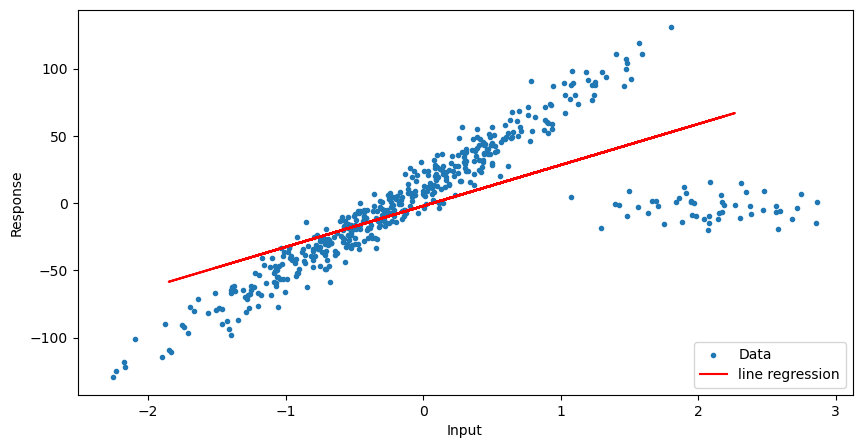

In [54]:
n_sample = 500
n_outliers = 50
X, y, coefficient = datasets.make_regression(n_samples=n_sample, n_features=1,n_informative=1,noise=10,coef = True,random_state=0)

#add outliers
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size = (n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size = (n_outliers))

# plt.figure(figsize=(10,5))
# plt.scatter(X,y)
# plt.show()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


line_X = np.arange(X.min(),X.max())[:,np.newaxis]

plt.figure(figsize=(10,5))
plt.scatter(X, y, marker = '.', label = 'Data')
plt.plot(X_test, y_pred, color = 'red', label = 'line regression')
plt.legend(loc = 'lower right')
plt.xlabel('Input')
plt.ylabel('Response')
plt.show()



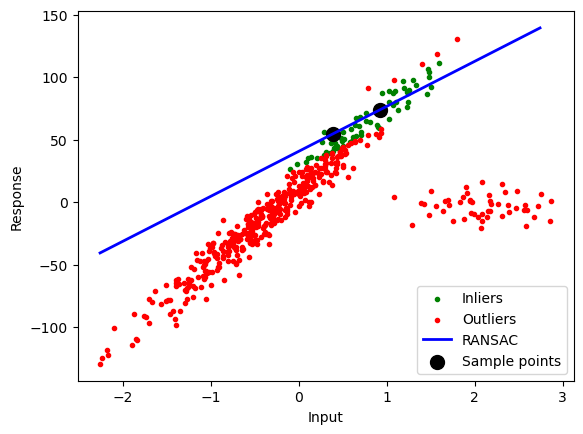

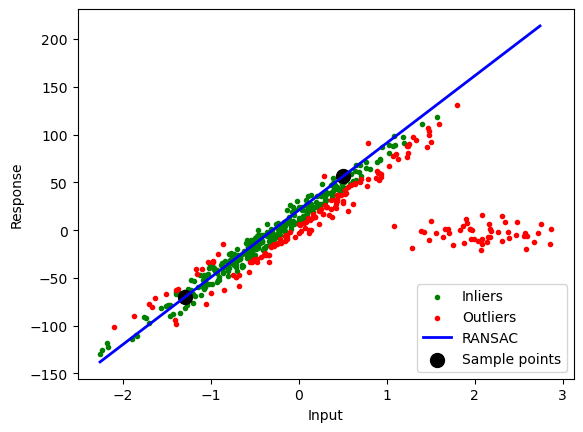

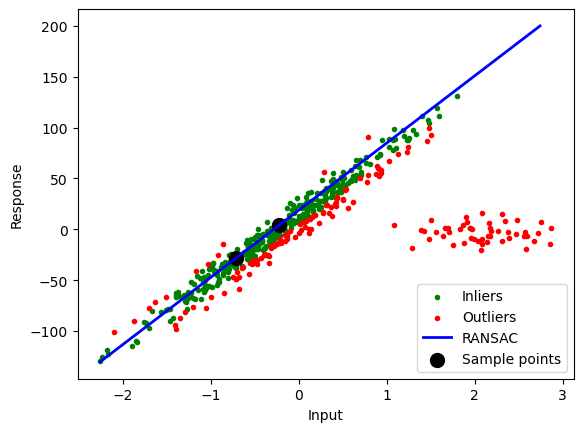

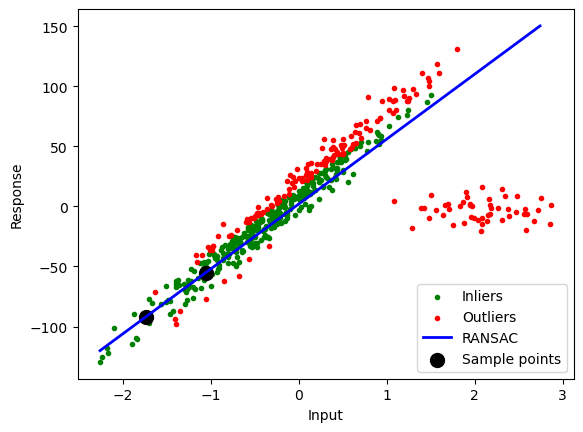

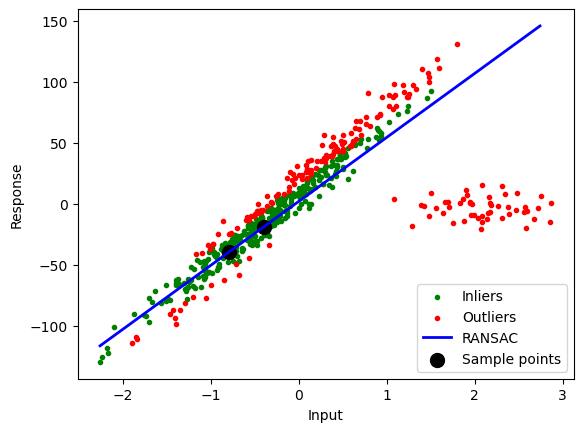

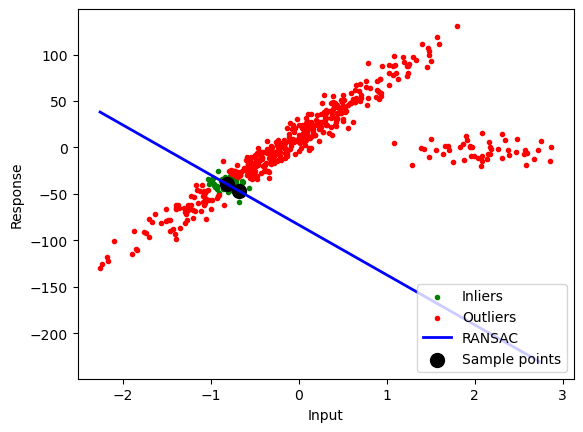

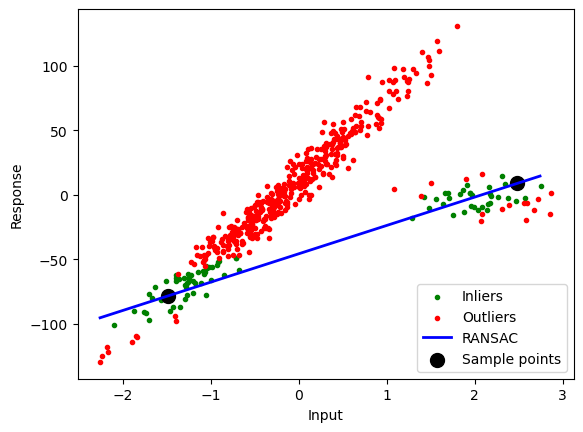

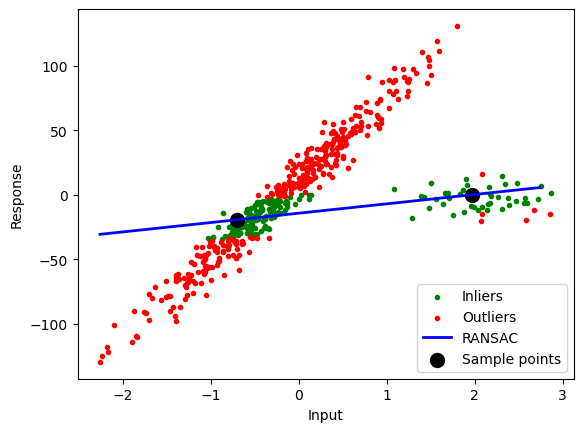

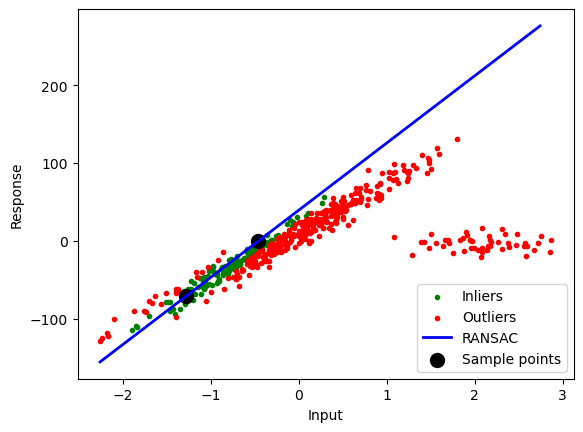

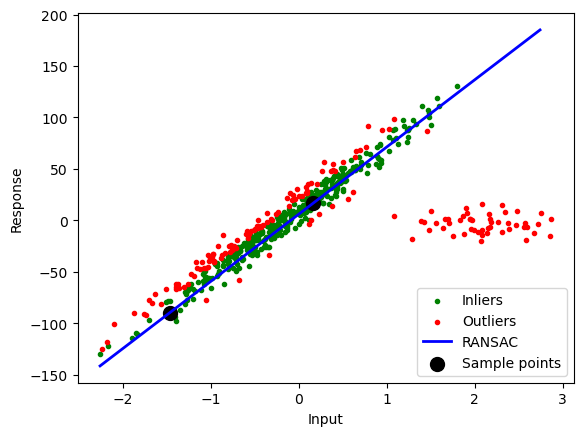

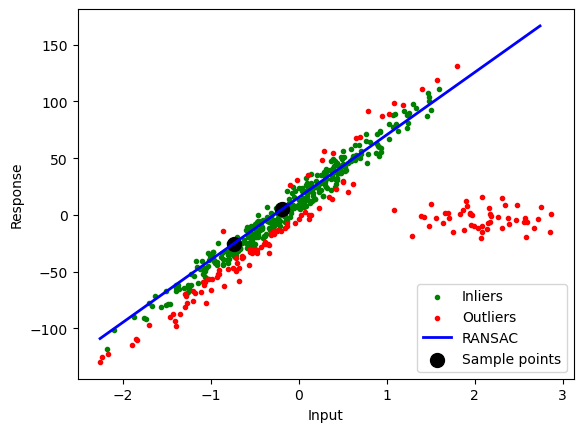

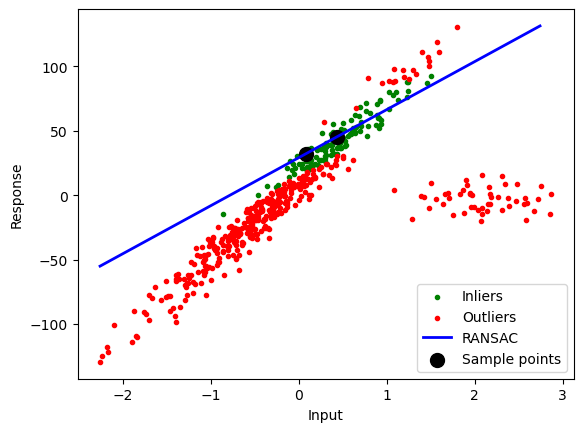

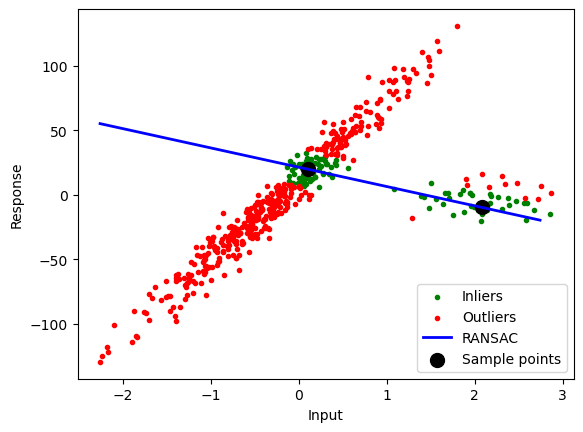

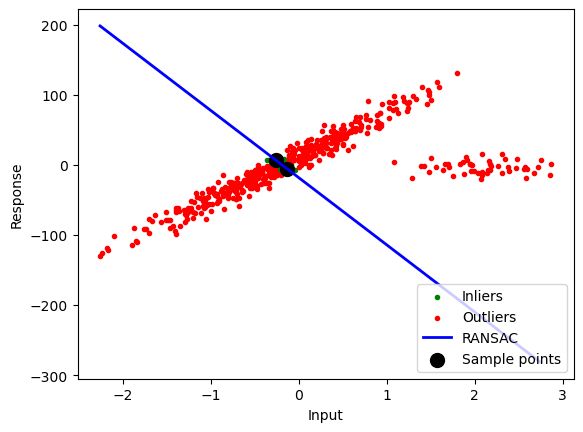

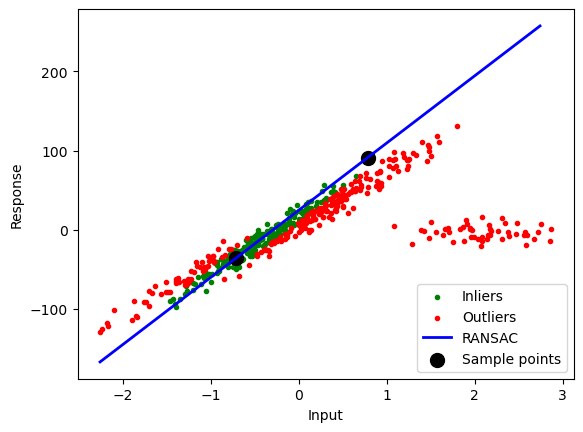

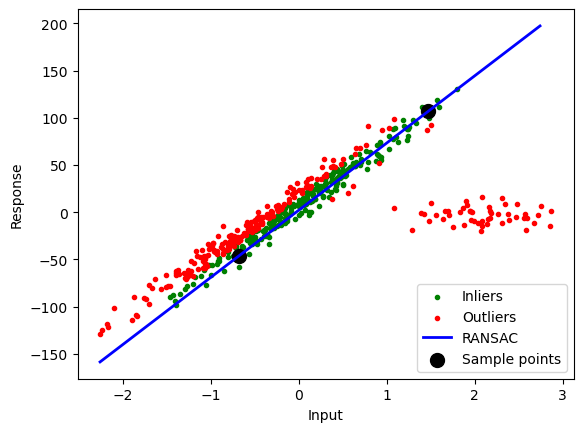

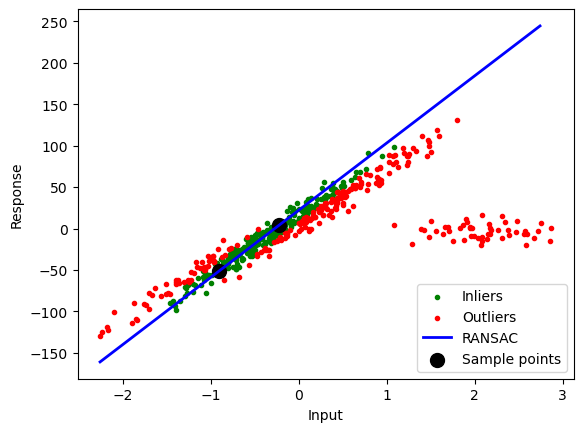

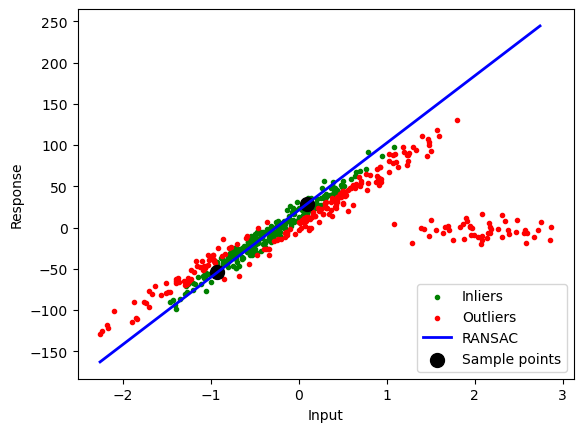

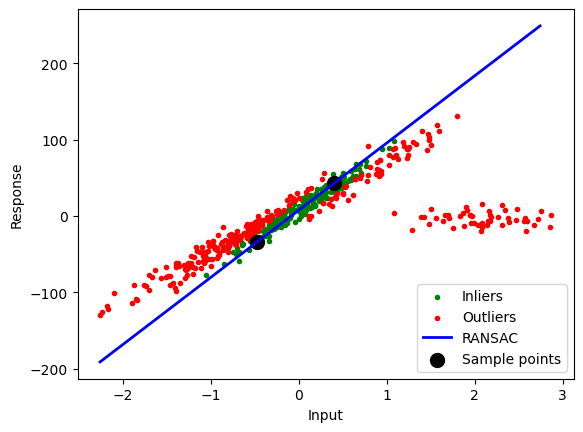

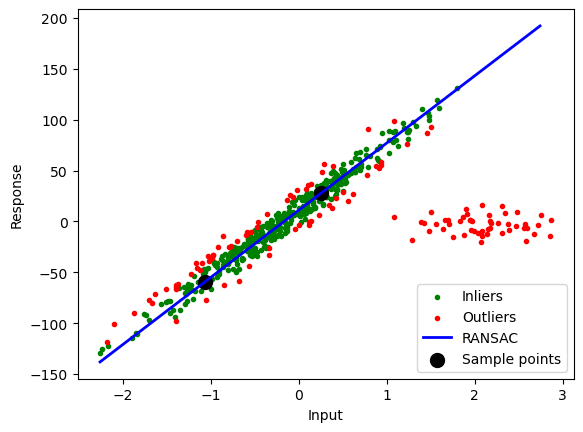

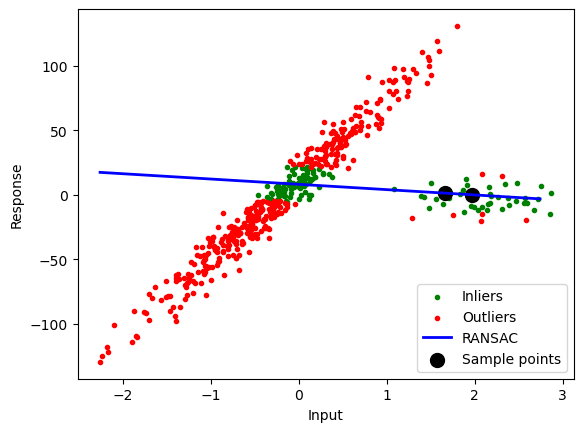

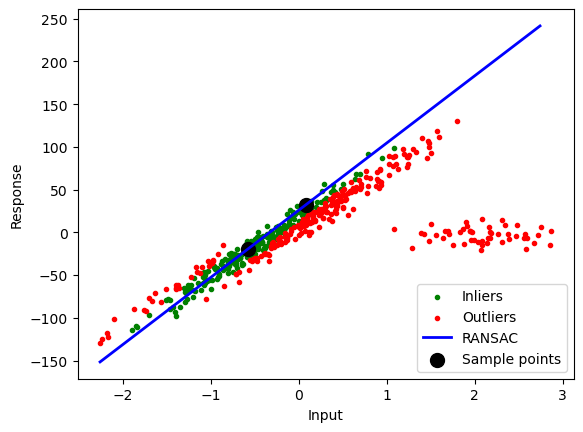

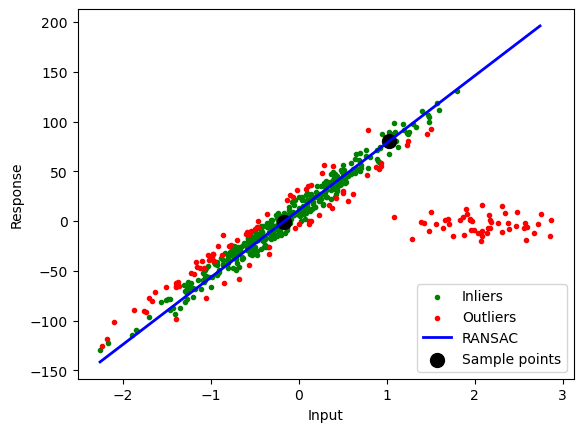

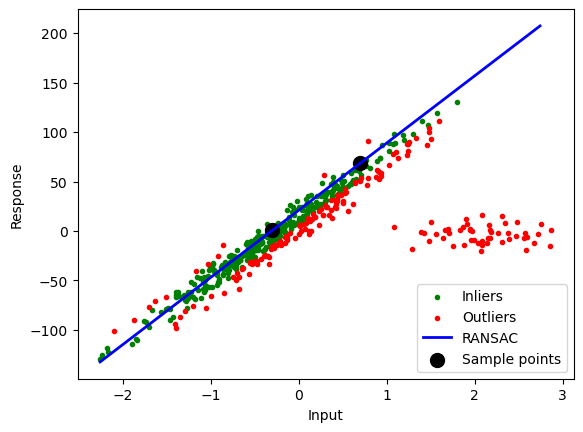

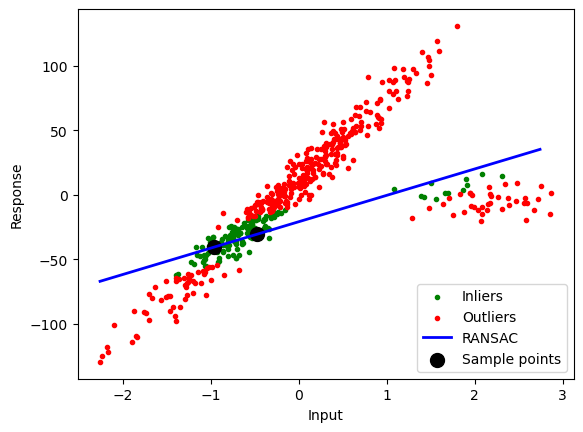

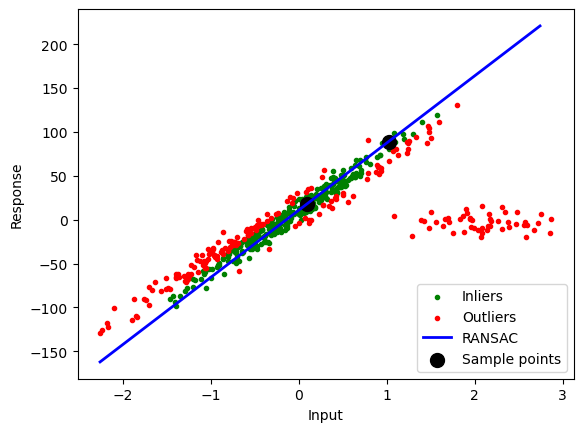

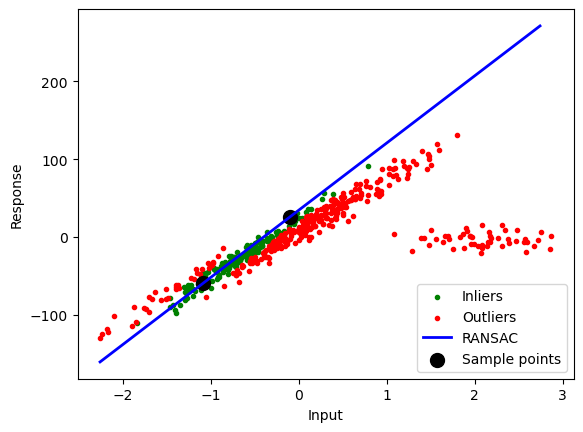

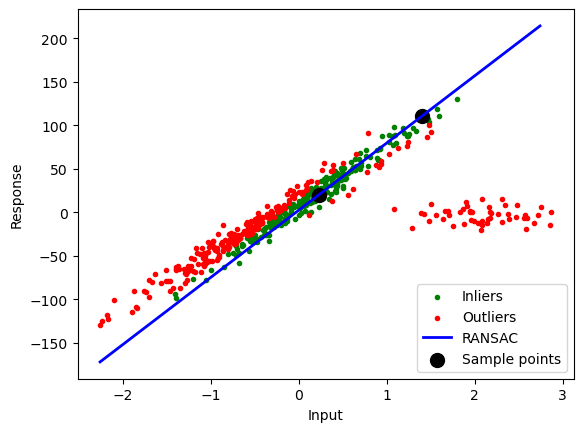

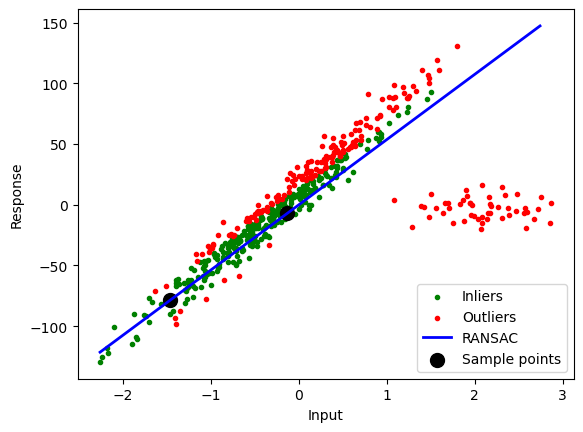

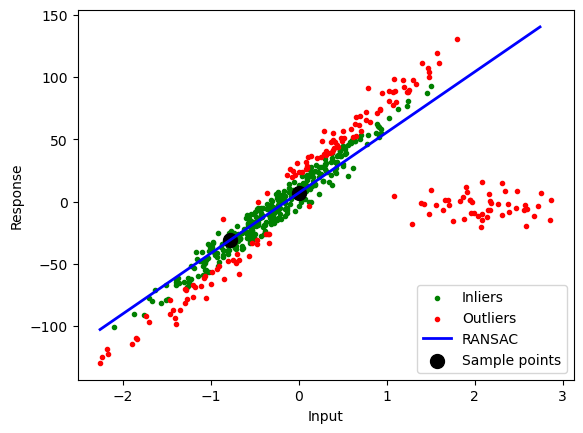

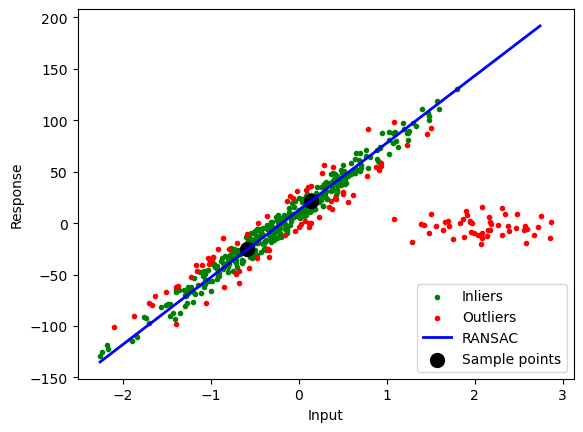

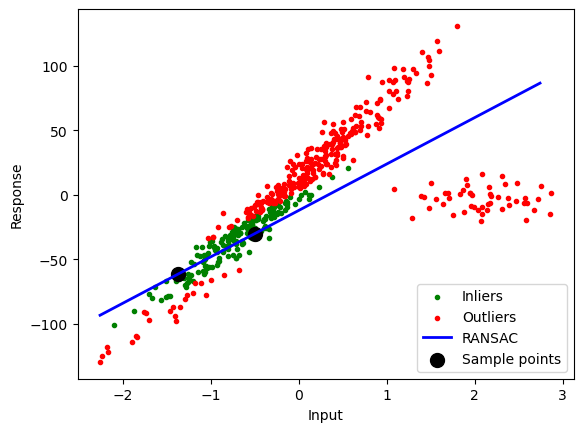

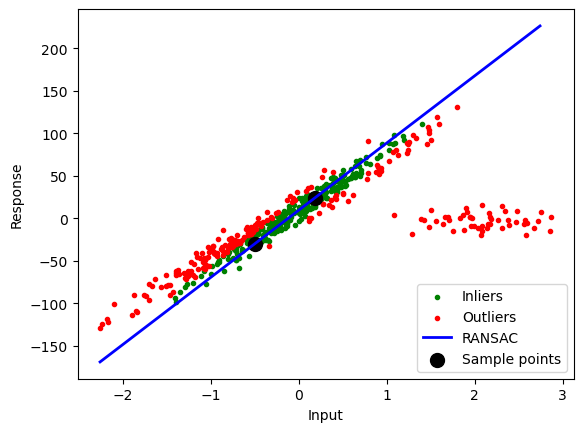

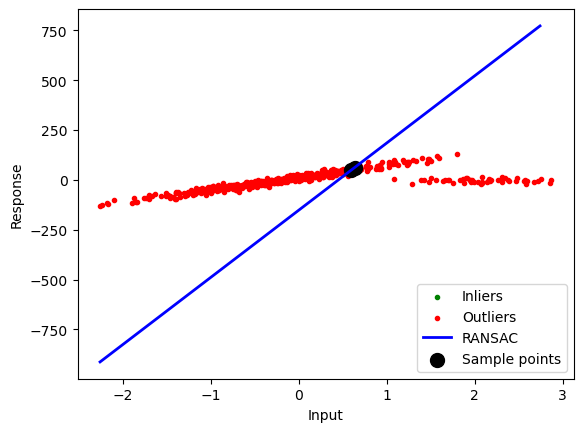

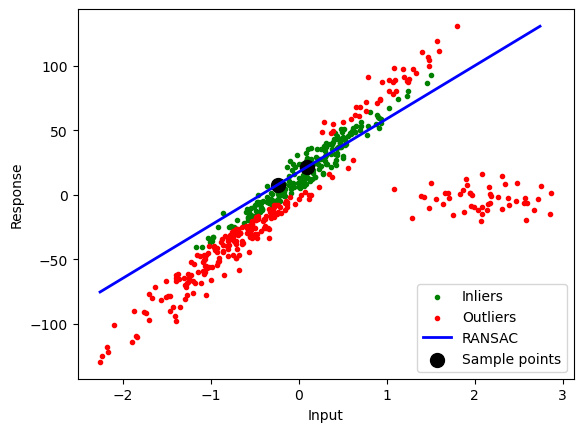

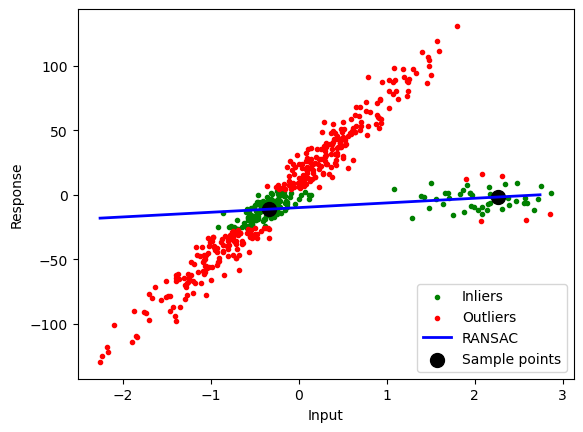

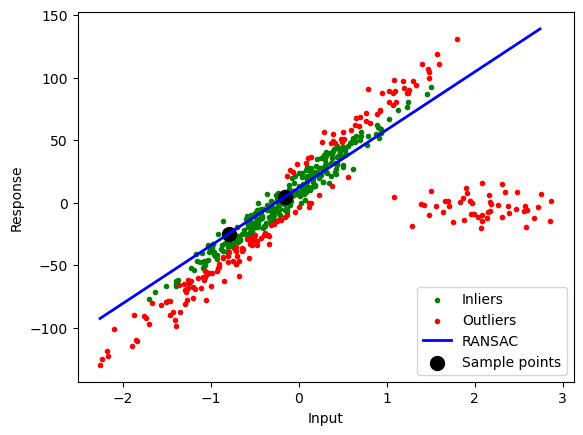

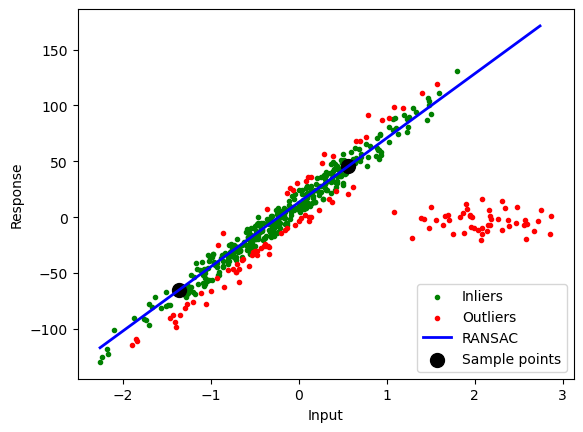

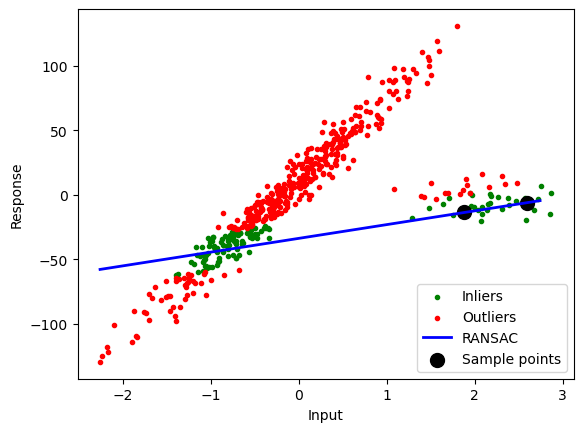

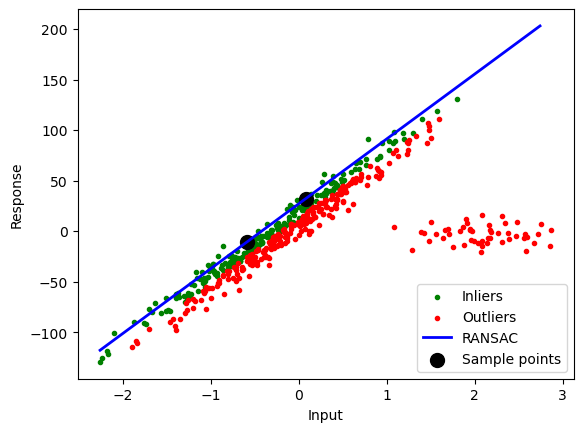

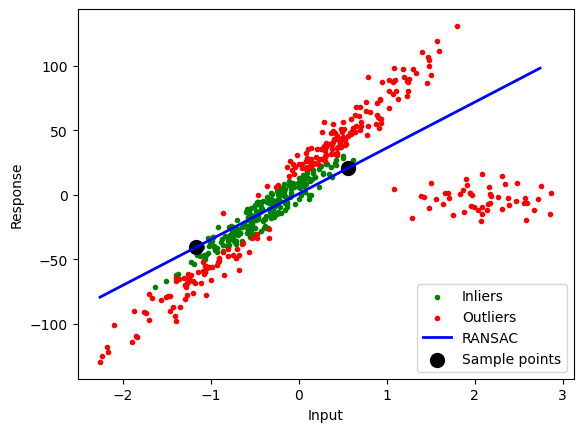

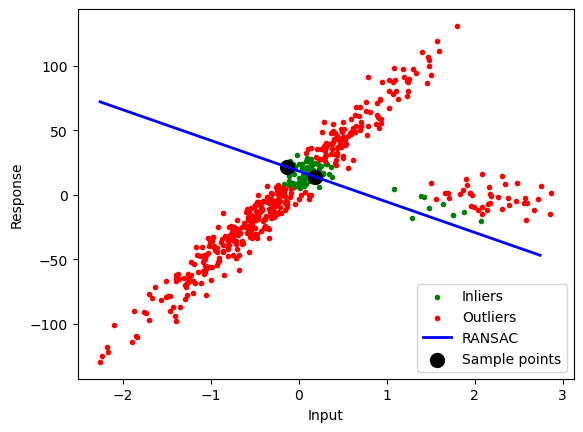

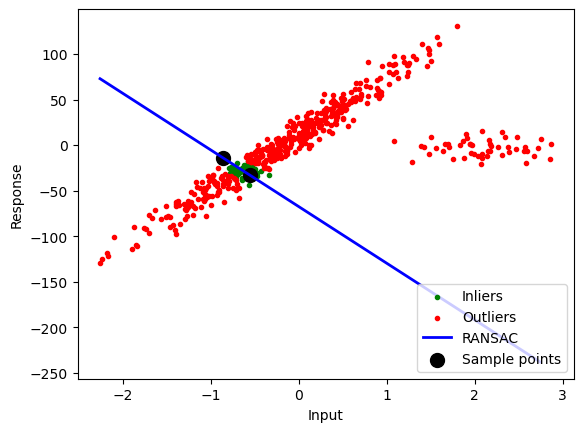

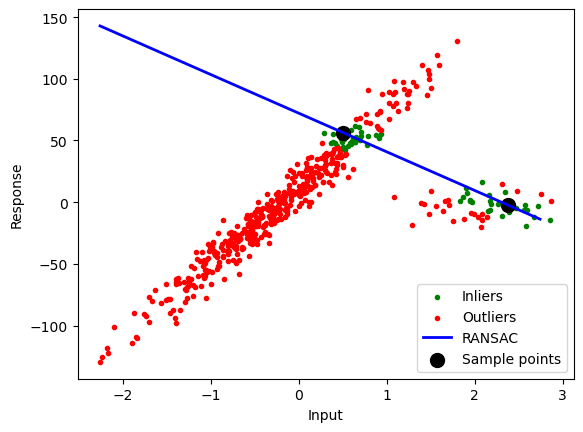

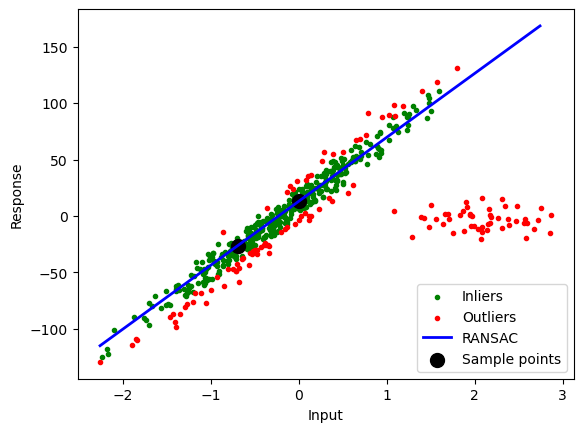

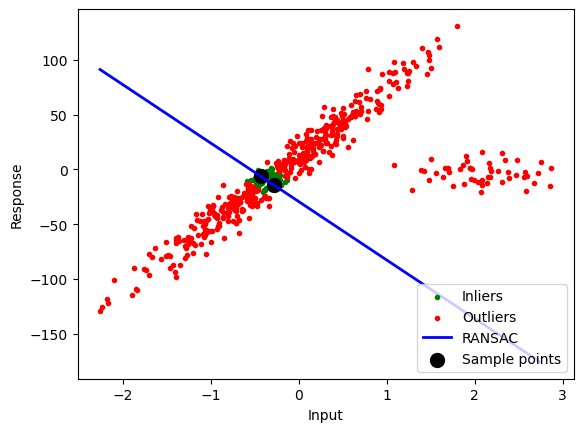

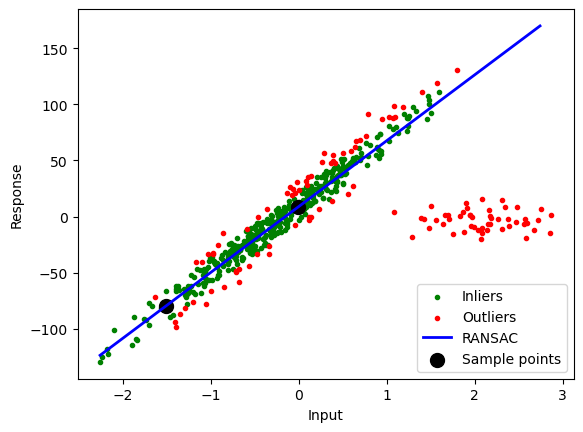

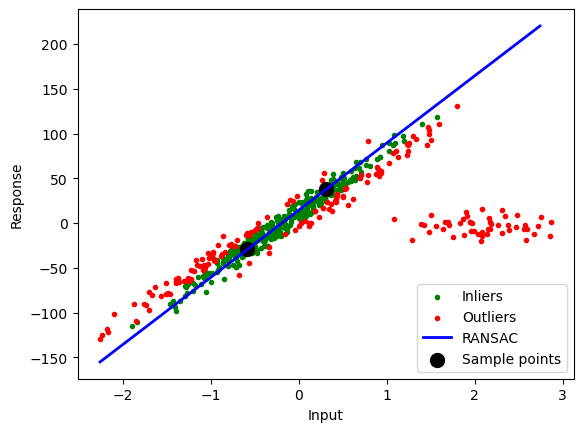

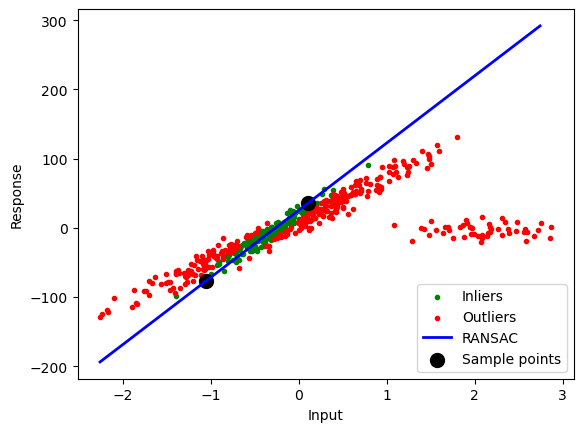

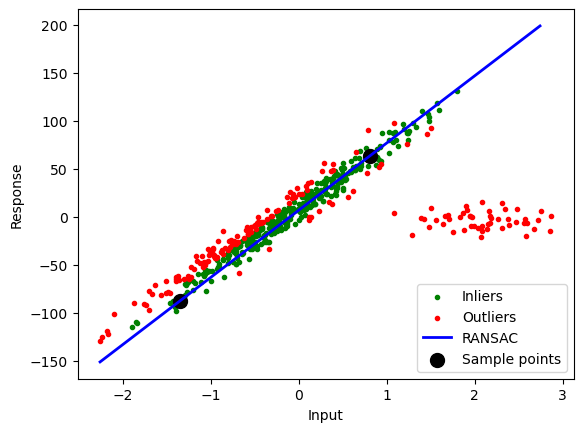

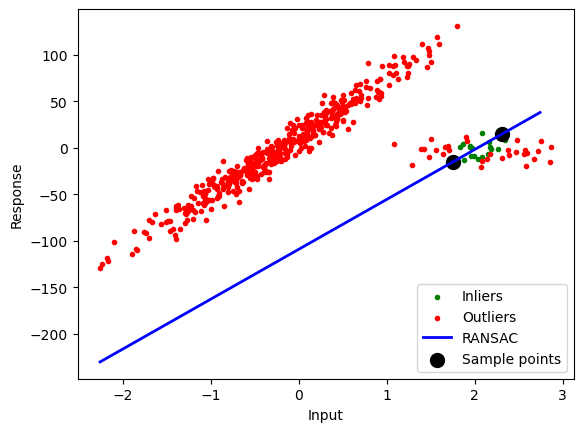

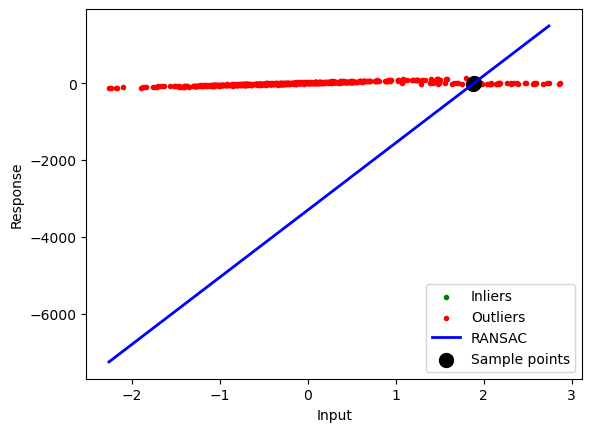

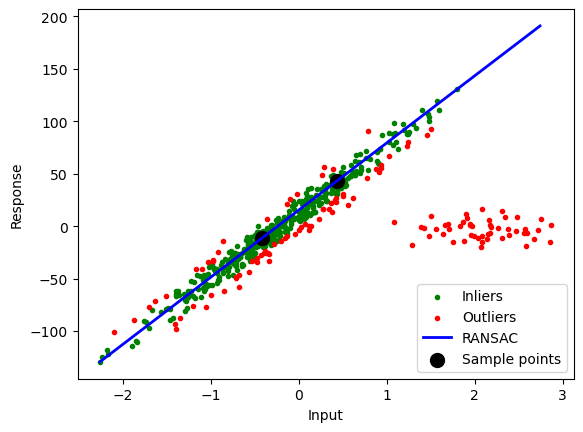

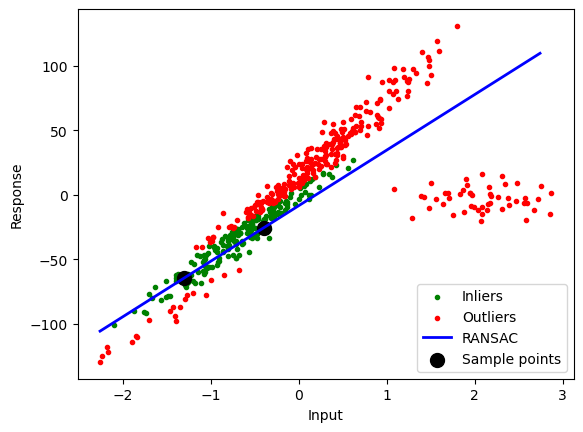

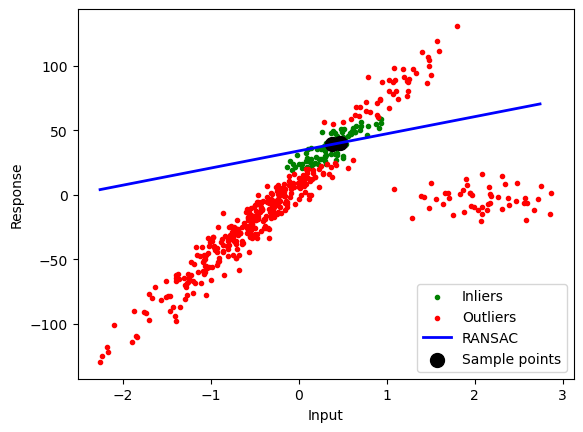

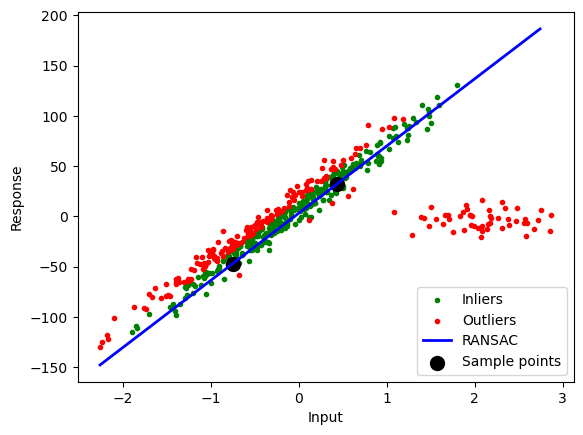

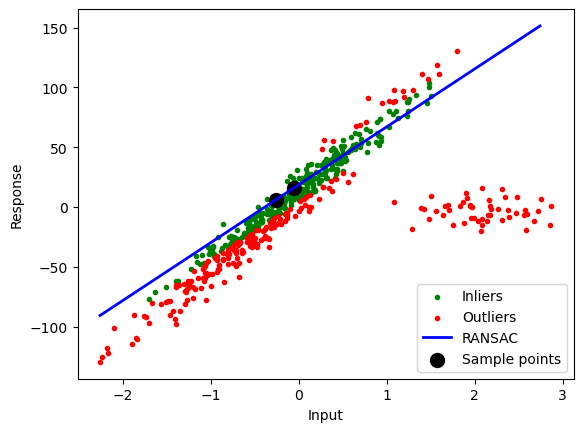

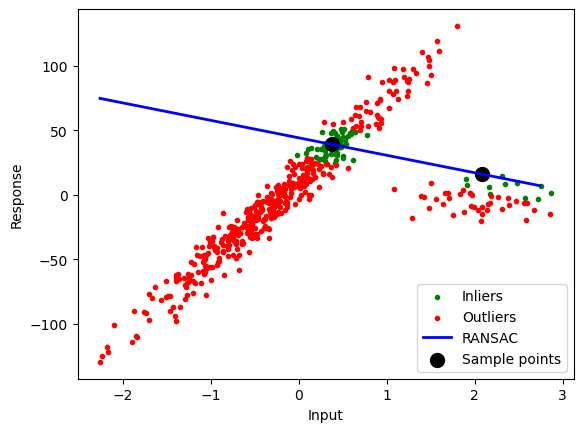

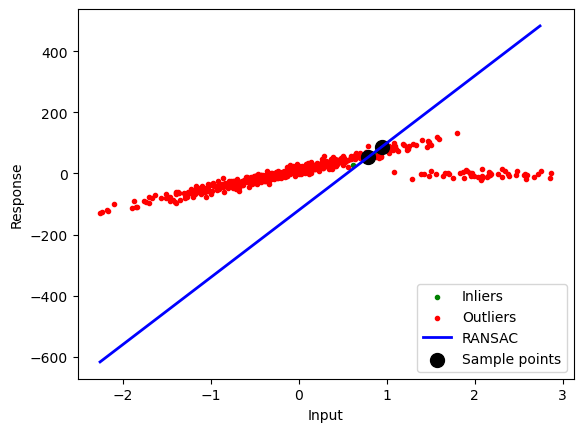

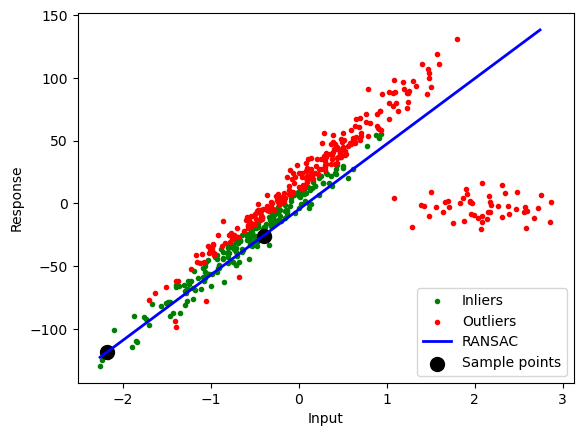

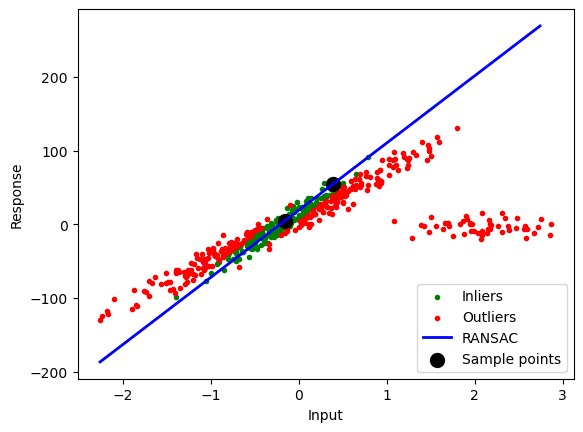

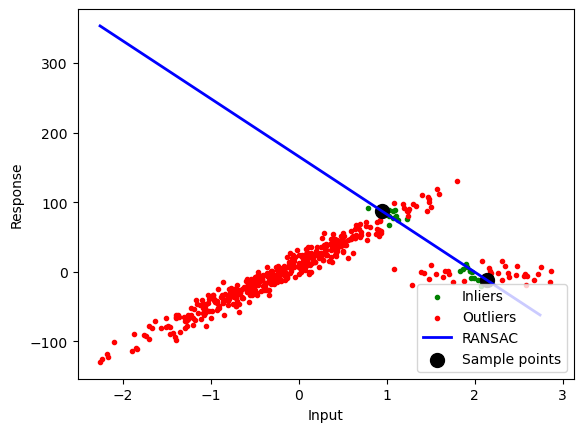

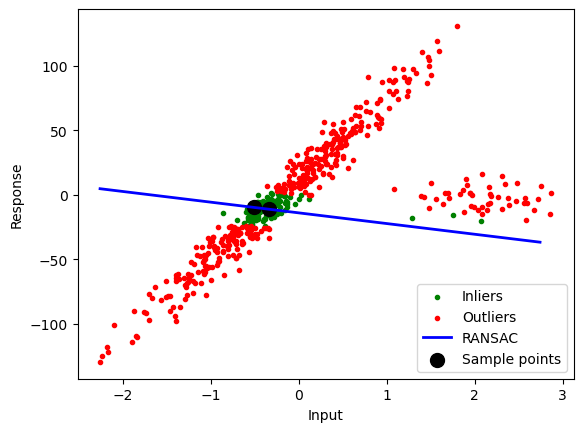

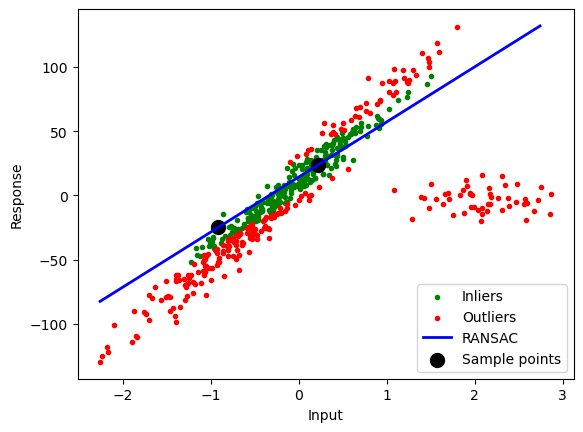

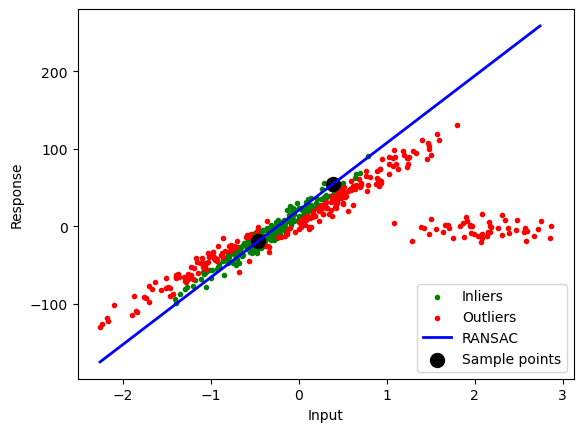

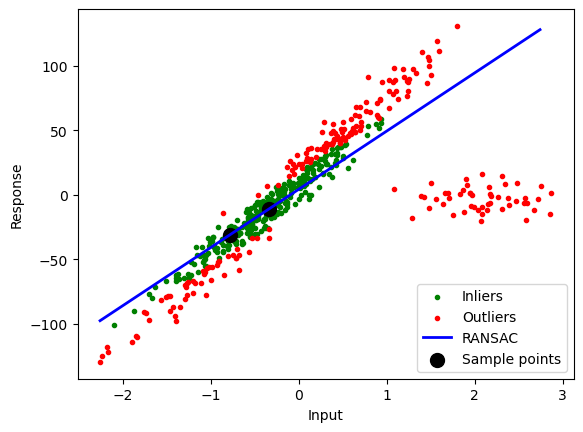

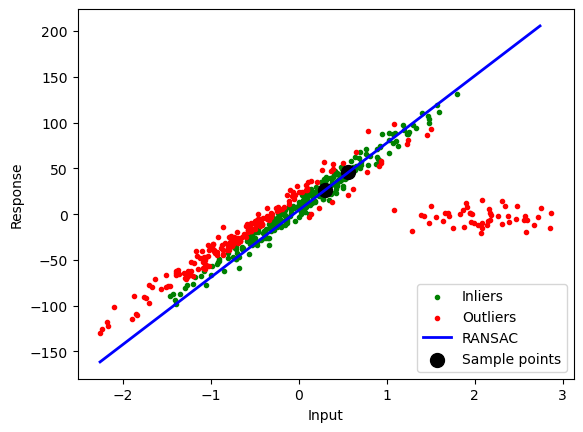

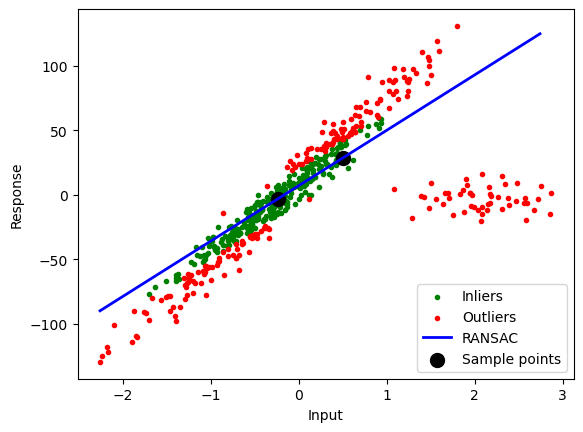

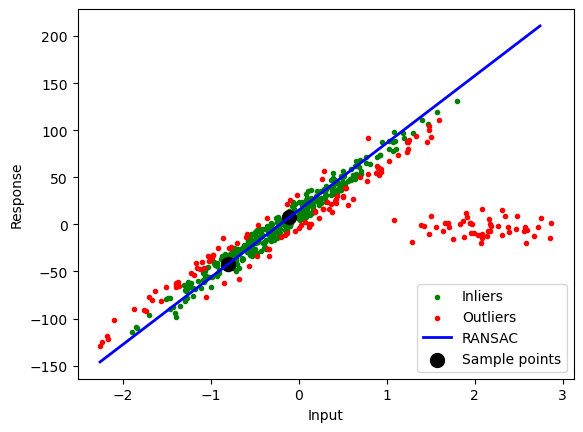

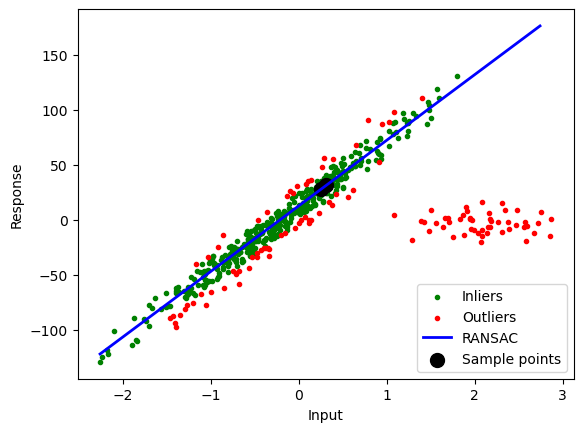

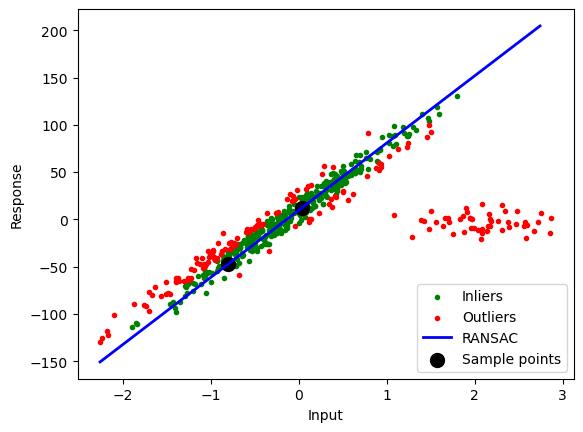

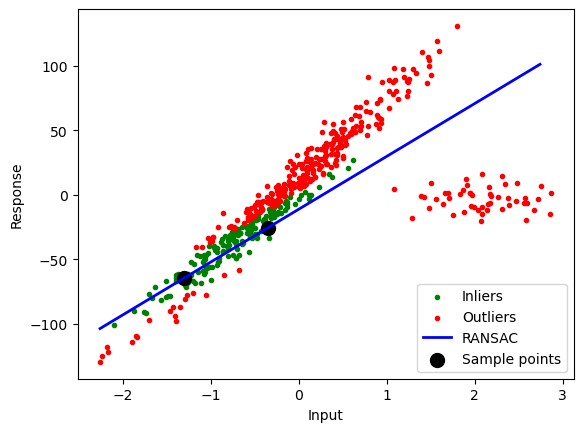

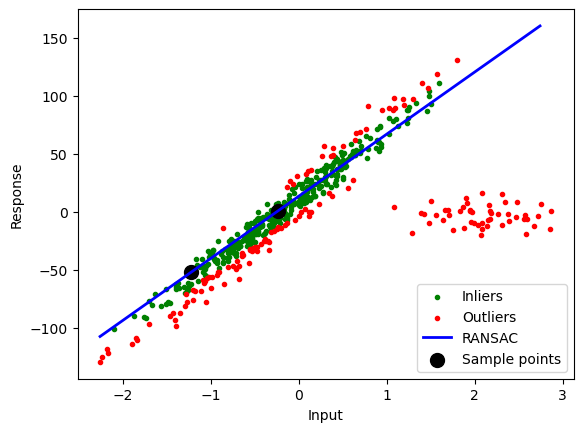

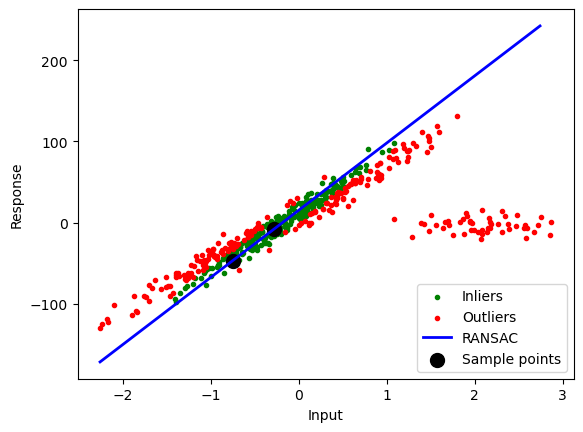

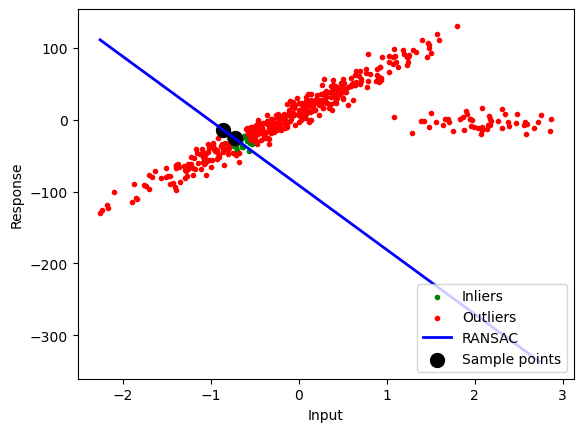

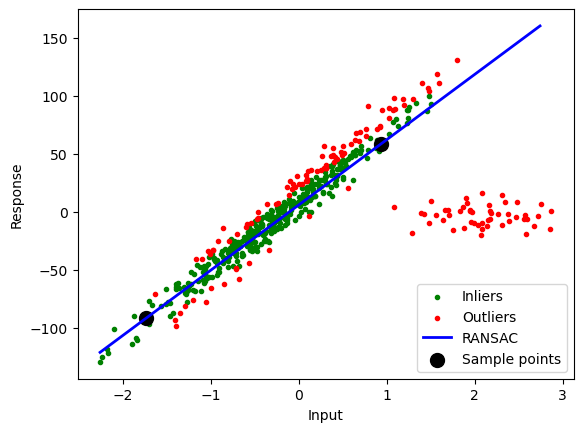

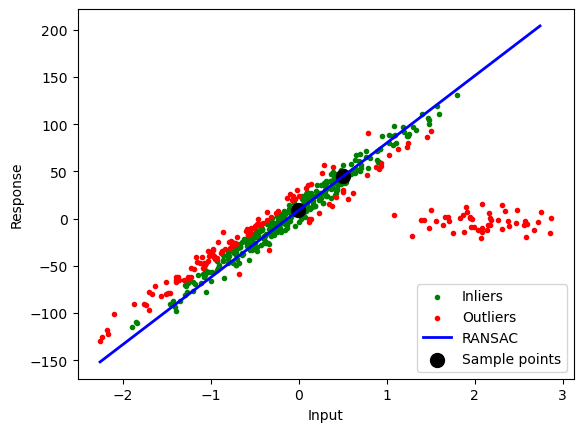

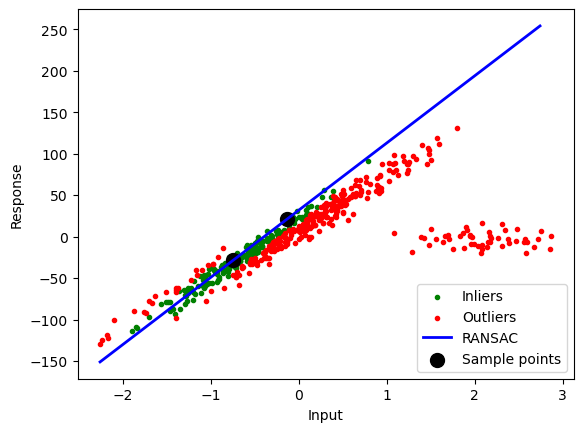

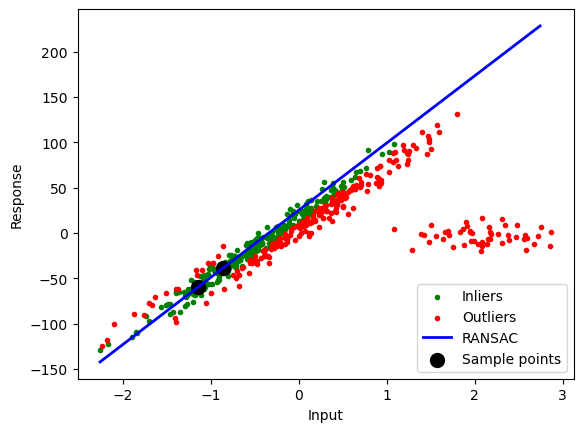

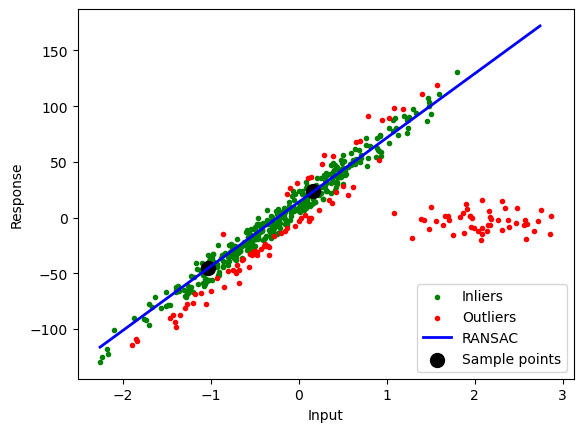

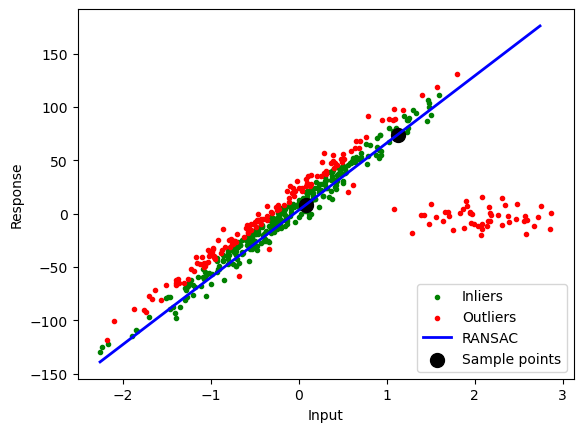

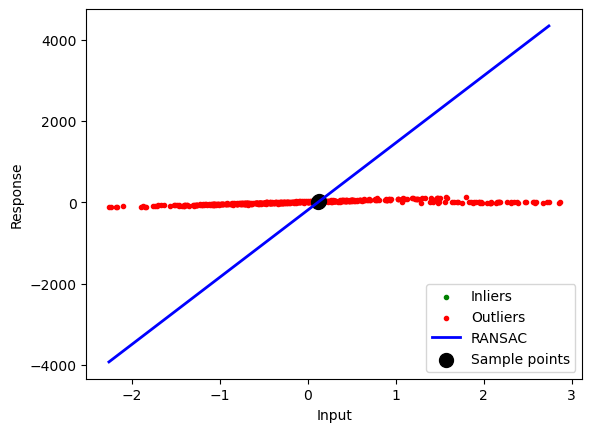

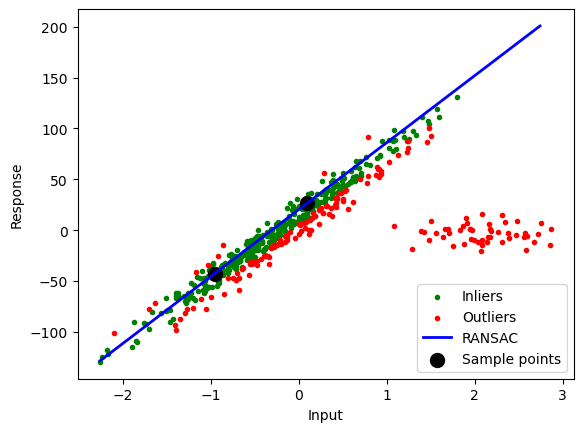

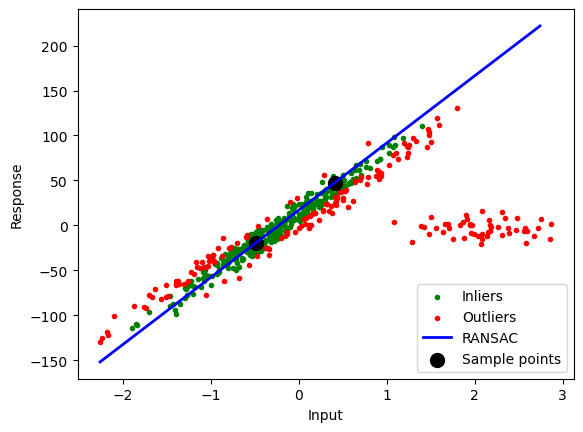

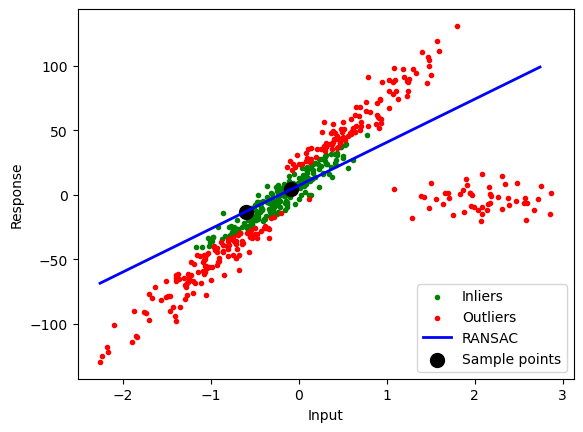

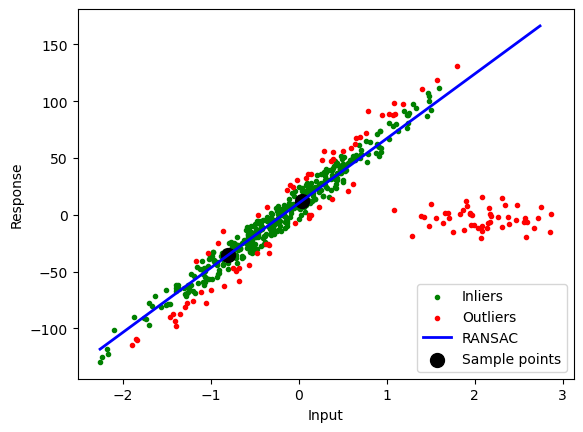

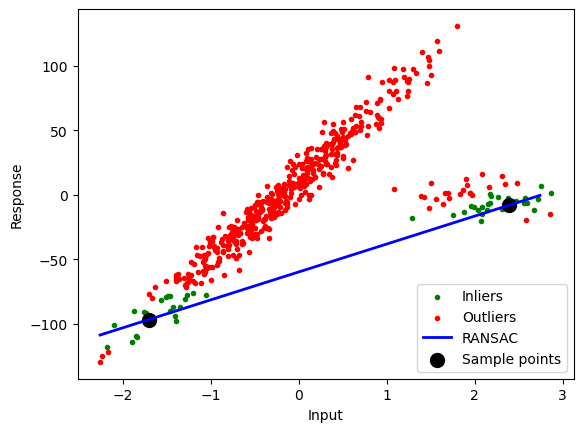

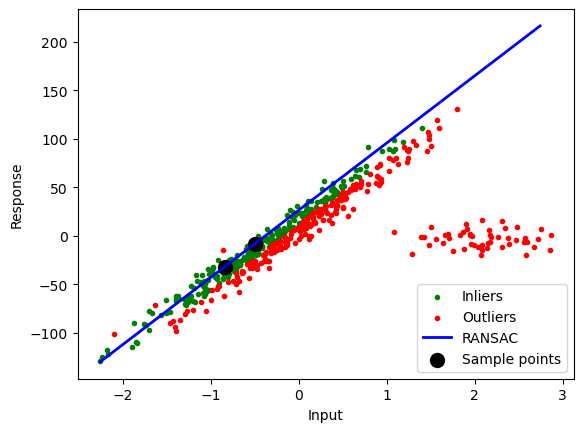

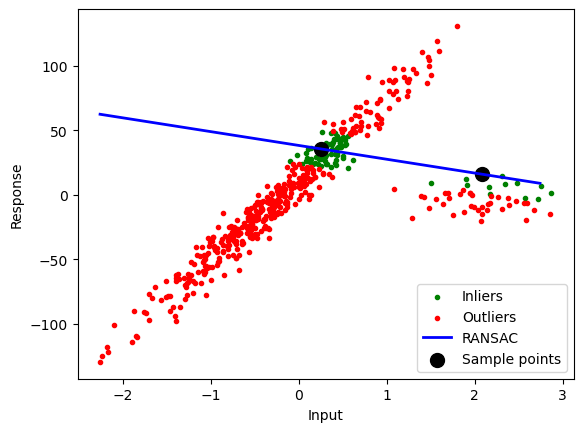

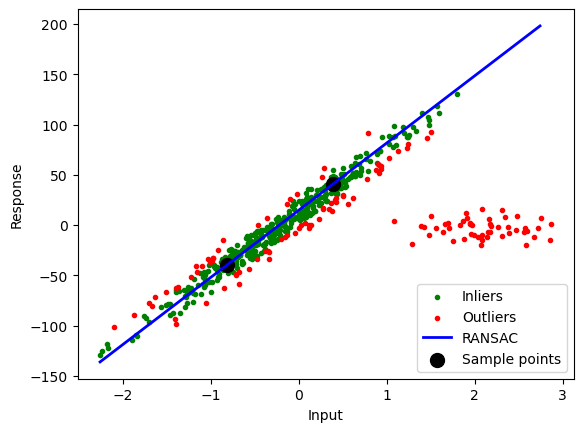

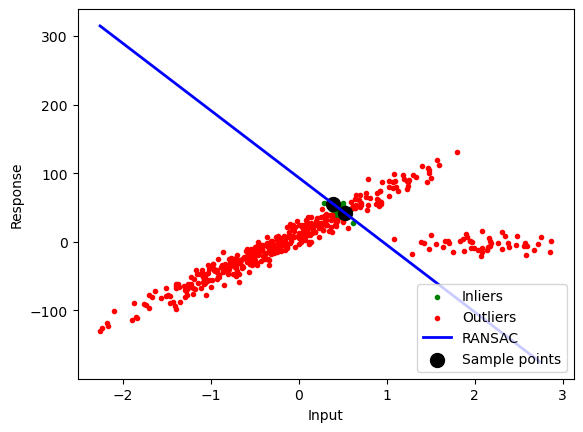

385
(59.73918302182609, 12.595416741470615)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True False  True
 False  True  True  True  True  True  True  True  True  True  True False
 False False False  True  True False  True False  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True 

In [65]:
ransac = Ransac1(max_iters_k = 100, threshold = 200, min_accaptable_inliers = 100)
ransac.fit(X,y,show_partial_results=True)
print(ransac.best_inlier_count)
print(ransac.best_model)
print(ransac.inlier_mask)

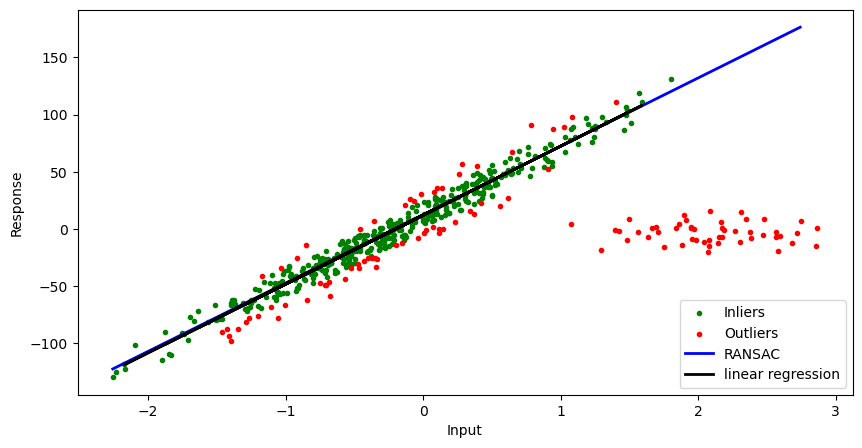

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X[ransac.inlier_mask],y[ransac.inlier_mask],test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac.best_model[0] * line_X + ransac.best_model[1]

plt.figure(figsize=(10,5))
plt.scatter(X[ransac.inlier_mask], y[ransac.inlier_mask], color = 'green', marker = '.', label = 'Inliers')
plt.scatter(X[~ransac.inlier_mask], y[~ransac.inlier_mask], color = 'red', marker = '.', label = 'Outliers')

plt.plot(line_X, line_y, color = 'blue', linewidth = 2, label = 'RANSAC')
plt.plot(X_test, y_pred, color = 'black', linewidth = 2, label = 'linear regression')

plt.legend(loc = 'lower right')
plt.xlabel('Input')
plt.ylabel('Response')
plt.show()


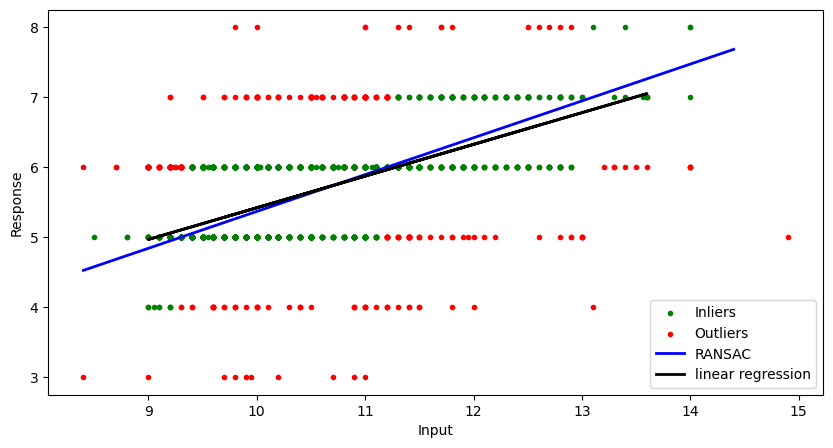

In [74]:
wine_red = pd.read_csv(r"data/winequality/winequality-red.csv", sep=';')

X = wine_red['alcohol'].values.reshape(-1,1)
y = wine_red['quality'].values

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

ransac = Ransac1(max_iters_k = 100, threshold = 1, min_accaptable_inliers = 100)
ransac.fit(X,y,show_partial_results=False)


X_train, X_test, y_train, y_test = train_test_split(X[ransac.inlier_mask],y[ransac.inlier_mask],test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac.best_model[0] * line_X + ransac.best_model[1]

plt.figure(figsize=(10,5))
plt.scatter(X[ransac.inlier_mask], y[ransac.inlier_mask], color = 'green', marker = '.', label = 'Inliers')
plt.scatter(X[~ransac.inlier_mask], y[~ransac.inlier_mask], color = 'red', marker = '.', label = 'Outliers')

plt.plot(line_X, line_y, color = 'blue', linewidth = 2, label = 'RANSAC')
plt.plot(X_test, y_pred, color = 'black', linewidth = 2, label = 'linear regression')

plt.legend(loc = 'lower right')
plt.xlabel('Input')
plt.ylabel('Response')
plt.show()

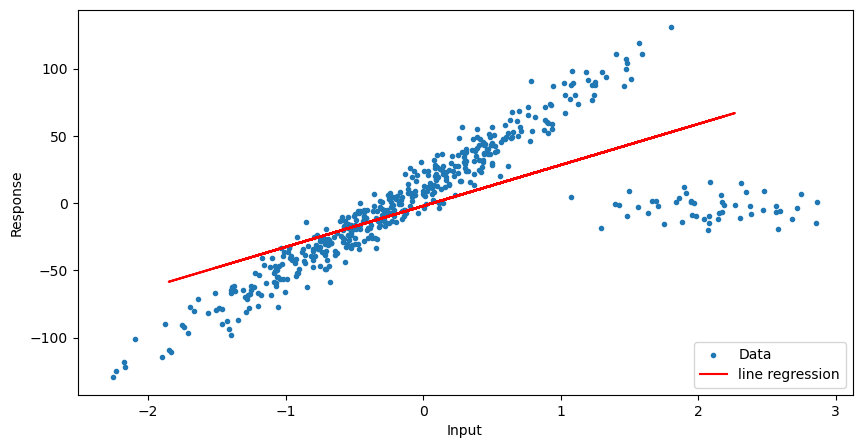

Estimated coeff. (true, linear regression, RANSAC)
[30.47933528] [58.10122226]


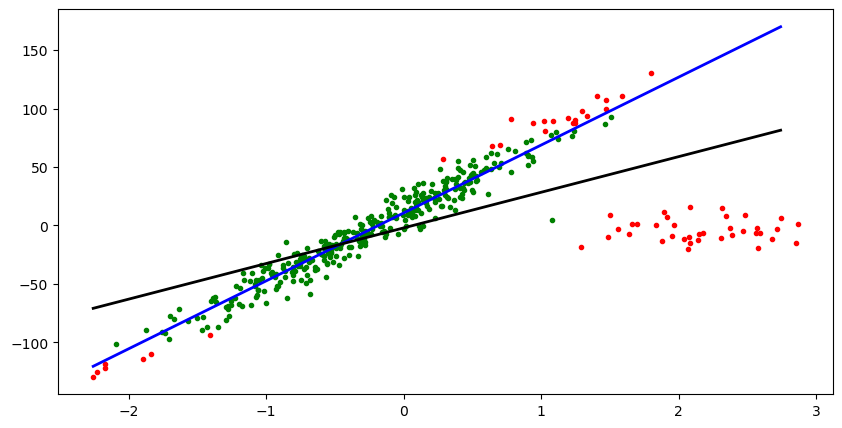

In [81]:
# ****** RANSAC SKLEARN *******
n_sample = 500
n_outliers = 50
X, y, coefficient = datasets.make_regression(n_samples=n_sample, n_features=1,n_informative=1,noise=10,coef = True,random_state=0)

#add outliers
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size = (n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size = (n_outliers))

# plt.figure(figsize=(10,5))
# plt.scatter(X,y)
# plt.show()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


line_X = np.arange(X.min(),X.max())[:,np.newaxis]

plt.figure(figsize=(10,5))
plt.scatter(X, y, marker = '.', label = 'Data')
plt.plot(X_test, y_pred, color = 'red', label = 'line regression')
plt.legend(loc = 'lower right')
plt.xlabel('Input')
plt.ylabel('Response')
plt.show()

ransac = linear_model.RANSACRegressor(
    base_estimator=LinearRegression(), 
    min_samples=0.7, 
    residual_threshold=robust.mad(y),
    max_trials=100
)

ransac.fit(X_train,y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print('Estimated coeff. (true, linear regression, RANSAC)')
print(lr.coef_, ransac.estimator_.coef_)

line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
plt.figure(figsize=(10,5))
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], color = 'green', marker = '.', label = 'Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], color = 'red', marker = '.', label = 'Outliers')

plt.plot(line_X, line_y_ransac, color = 'blue', linewidth = 2, label = 'RANSAC')
plt.plot(line_X, line_y, color = 'black', linewidth = 2, label = 'linear regression')

# plt.legend(loc = 'lower right')
# plt.xlabel('Input')
# plt.ylabel('Response')
# plt.show()

